#String Matching Artikel menggunakan Cosine dan Euclidean Similarity

Eksperimen yang dilakukan

1.	Tf scenario only performs TF-IDF against title data;
2.	StopTF performs TF-IDF and stopwords removal;
3.	StopStemTF performs TF-IDF, stopwords removal and stemming;
4.	StemTF performs TF-IDF and stemming processes;
5.	NoTF performs processes without vectors;
6.	StopNoTF performs the stopwords removal without TF-IDF;
7.	StopStemNoTF performs stopwords removal, stemming without TF-IDF;
8.	StemNoTF performs the stemming process without TF-IDF.


#Load Data Set

In [36]:
#Install Library
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('drive/MyDrive/datamining/dataset/medicalimagesegmentation.csv')
data

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,CitationURL,Volume,Issue,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age
0,528,"MH Hesamian, W Jia, X He, P Kennedy",Deep learning techniques for medical image seg...,2019.0,Journal of digital imaging,Springer,https://link.springer.com/article/10.1007/s102...,https://scholar.google.com/scholar?cites=11265...,1,2022-02-22,...,NaN,NaN,NaN,NaN,NaN,528,176.00,132,4,3.0
1,186,"MZ Alom, C Yakopcic, M Hasan…",Recurrent residual U-Net for medical image seg...,2019.0,Journal of Medical …,spiedigitallibrary.org,https://www.spiedigitallibrary.org/journals/Jo...,https://scholar.google.com/scholar?cites=13550...,2,2022-02-22,...,NaN,NaN,NaN,NaN,NaN,186,62.00,47,4,3.0
2,146,"A Sinha, J Dolz",Multi-scale self-guided attention for medical ...,2020.0,IEEE journal of biomedical and health …,ieeexplore.ieee.org,https://ieeexplore.ieee.org/abstract/document/...,https://scholar.google.com/scholar?cites=34269...,3,2022-02-22,...,NaN,NaN,NaN,NaN,NaN,146,73.00,73,2,2.0
3,25,"L Teng, H Li, S Karim",DMCNN: A deep multiscale convolutional neural ...,2019.0,Journal of Healthcare Engineering,hindawi.com,https://www.hindawi.com/journals/jhe/2019/8597...,https://scholar.google.com/scholar?cites=10095...,4,2022-02-22,...,NaN,NaN,NaN,NaN,NaN,25,8.33,8,3,3.0
4,52,"G Du, X Cao, J Liang, X Chen…",Medical image segmentation based on u-net: A r...,2020.0,Journal of Imaging …,ingentaconnect.com,https://www.ingentaconnect.com/content/ist/jis...,https://scholar.google.com/scholar?cites=16851...,5,2022-02-22,...,NaN,NaN,NaN,NaN,NaN,52,26.00,10,5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,3,"H Allioui, M Sadgal, A El Fazziki",An Improved Image Segmentation System: A Coope...,2020.0,Journal of Communications Software …,hrcak.srce.hr,https://hrcak.srce.hr/clanak/348938,https://scholar.google.com/scholar?cites=11169...,101,2022-02-22,...,NaN,NaN,NaN,NaN,NaN,3,1.50,1,3,2.0
101,0,"X Yi, J Hou",Segmentation of Medical Image Based on Superpi...,2021.0,Journal of Medical Imaging and Health Informatics,ingentaconnect.com,https://www.ingentaconnect.com/contentone/asp/...,NaN,102,2022-02-22,...,NaN,NaN,NaN,NaN,NaN,0,0.00,0,2,1.0
102,0,E IRMAK,Consistency and Comparison of Medical Image Re...,NaN,Balkan Journal of Electrical and Computer Engi...,dergipark.org.tr,https://dergipark.org.tr/en/pub/bajece/issue/5...,NaN,103,2022-02-22,...,NaN,NaN,NaN,NaN,NaN,0,0.00,0,1,NaN
103,1,"R Khan, R Debnath",Morphology Preserving Segmentation Method for ...,2021.0,International Journal of Image and Graphics,World Scientific,https://www.worldscientific.com/doi/abs/10.114...,https://scholar.google.com/scholar?cites=26987...,104,2022-02-22,...,NaN,NaN,NaN,NaN,NaN,1,1.00,1,2,1.0


In [5]:
title=data['Title']
title

0      Deep learning techniques for medical image seg...
1      Recurrent residual U-Net for medical image seg...
2      Multi-scale self-guided attention for medical ...
3      DMCNN: A deep multiscale convolutional neural ...
4      Medical image segmentation based on u-net: A r...
                             ...                        
100    An Improved Image Segmentation System: A Coope...
101    Segmentation of Medical Image Based on Superpi...
102    Consistency and Comparison of Medical Image Re...
103    Morphology Preserving Segmentation Method for ...
104    FRFCM clustering segmentation method for medic...
Name: Title, Length: 105, dtype: object

##Preprocessing

### Lowercasing sentences and removing punctuations

In [6]:
title = title.str.lower()

In [7]:
title = title.str.replace(r'[^\w\s]',"")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


### Stopwords

In [9]:
stop = stopwords.words('english')

In [11]:
adding = ['medical','image','segmentation']
stop.extend(adding)

In [12]:
pat = r'\b(?:{})\b'.format('|'.join(stop))  #joining all words in one line separated by |
titlestop = title.str.replace(pat, '')  # replace stopword
titlestop = titlestop.str.replace(r'\s+', ' ')  #space tidying

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
pd.options.display.max_colwidth = 1000

In [14]:
dfstop = pd.DataFrame(list(zip(title, titlestop)),columns=['title','title after stopwords'])
dfstop

,title,title after stopwords
0,deep learning techniques for medical image segmentation achievements and challenges,deep learning techniques achievements challenges
1,recurrent residual unet for medical image segmentation,recurrent residual unet
2,multiscale selfguided attention for medical image segmentation,multiscale selfguided attention
3,dmcnn a deep multiscale convolutional neural network model for medical image segmentation,dmcnn deep multiscale convolutional neural network model
4,medical image segmentation based on unet a review,based unet review
...,...,...
100,an improved image segmentation system a cooperative multiagent strategy for 2d3d medical images,improved system cooperative multiagent strategy 2d3d images
101,segmentation of medical image based on superpixel boundary perceptual convolutional network in cancer diagnosis and treatment,based superpixel boundary perceptual convolutional network cancer diagnosis treatment
102,consistency and comparison of medical image registrationsegmentation and mathematical model for glioblastoma volume progression,consistency comparison registrationsegmentation mathematical model glioblastoma volume progression
103,morphology preserving segmentation method for occluded cell nuclei from medical microscopy image,morphology preserving method occluded cell nuclei microscopy


### Stemming


In [16]:
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

dfstop["stemmed"] = dfstop["title after stopwords"].apply(lambda text: stem_words(text))
dfstop["stemmed wo stopwords"] = dfstop["title"].apply(lambda text: stem_words(text))
dfstop

,title,title after stopwords,stemmed,stemmed wo stopwords
0,deep learning techniques for medical image segmentation achievements and challenges,deep learning techniques achievements challenges,deep learn techniqu achiev challeng,deep learn techniqu for medic imag segment achiev and challeng
1,recurrent residual unet for medical image segmentation,recurrent residual unet,recurr residu unet,recurr residu unet for medic imag segment
2,multiscale selfguided attention for medical image segmentation,multiscale selfguided attention,multiscal selfguid attent,multiscal selfguid attent for medic imag segment
3,dmcnn a deep multiscale convolutional neural network model for medical image segmentation,dmcnn deep multiscale convolutional neural network model,dmcnn deep multiscal convolut neural network model,dmcnn a deep multiscal convolut neural network model for medic imag segment
4,medical image segmentation based on unet a review,based unet review,base unet review,medic imag segment base on unet a review
...,...,...,...,...
100,an improved image segmentation system a cooperative multiagent strategy for 2d3d medical images,improved system cooperative multiagent strategy 2d3d images,improv system cooper multiag strategi 2d3d imag,an improv imag segment system a cooper multiag strategi for 2d3d medic imag
101,segmentation of medical image based on superpixel boundary perceptual convolutional network in cancer diagnosis and treatment,based superpixel boundary perceptual convolutional network cancer diagnosis treatment,base superpixel boundari perceptu convolut network cancer diagnosi treatment,segment of medic imag base on superpixel boundari perceptu convolut network in cancer diagnosi and treatment
102,consistency and comparison of medical image registrationsegmentation and mathematical model for glioblastoma volume progression,consistency comparison registrationsegmentation mathematical model glioblastoma volume progression,consist comparison registrationsegment mathemat model glioblastoma volum progress,consist and comparison of medic imag registrationsegment and mathemat model for glioblastoma volum progress
103,morphology preserving segmentation method for occluded cell nuclei from medical microscopy image,morphology preserving method occluded cell nuclei microscopy,morpholog preserv method occlud cell nuclei microscopi,morpholog preserv segment method for occlud cell nuclei from medic microscopi imag


### Vectorizing

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(dfstop['stemmed'])

### Checking Term Before and After Pre-processing

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(title)

In [20]:
vectorizer.vocabulary_

{'2d': 0,
 '2d3d': 1,
 '2partition': 2,
 '3d': 3,
 'accelerating': 4,
 'achievements': 5,
 'active': 6,
 'adaptation': 7,
 'adapted': 8,
 'adaptive': 9,
 'advanced': 10,
 'adversarial': 11,
 'aggregation': 12,
 'agreements': 13,
 'ai': 14,
 'algorithm': 15,
 'algorithms': 16,
 'amplification': 17,
 'an': 18,
 'analysis': 19,
 'analyzing': 20,
 'and': 21,
 'anisotropic': 22,
 'application': 23,
 'applications': 24,
 'applied': 25,
 'approach': 26,
 'approaches': 27,
 'architecture': 28,
 'artificial': 29,
 'atrous': 30,
 'attention': 31,
 'attentionoriented': 32,
 'augmentation': 33,
 'automatic': 34,
 'based': 35,
 'better': 36,
 'between': 37,
 'bibliometric': 38,
 'bionic': 39,
 'boltzmann': 40,
 'boundary': 41,
 'brain': 42,
 'brief': 43,
 'by': 44,
 'cancer': 45,
 'cardiac': 46,
 'cea': 47,
 'cell': 48,
 'challenges': 49,
 'channel': 50,
 'classification': 51,
 'clustering': 52,
 'cmeans': 53,
 'cnn': 54,
 'combination': 55,
 'comparative': 56,
 'comparison': 57,
 'computed': 58,
 

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(dfstop['title after stopwords'])

In [22]:
vectorizer.vocabulary_

{'2d': 0,
 '2d3d': 1,
 '2partition': 2,
 '3d': 3,
 'accelerating': 4,
 'achievements': 5,
 'active': 6,
 'adaptation': 7,
 'adapted': 8,
 'adaptive': 9,
 'advanced': 10,
 'adversarial': 11,
 'aggregation': 12,
 'agreements': 13,
 'ai': 14,
 'algorithm': 15,
 'algorithms': 16,
 'amplification': 17,
 'analysis': 18,
 'analyzing': 19,
 'anisotropic': 20,
 'application': 21,
 'applications': 22,
 'applied': 23,
 'approach': 24,
 'approaches': 25,
 'architecture': 26,
 'artificial': 27,
 'atrous': 28,
 'attention': 29,
 'attentionoriented': 30,
 'augmentation': 31,
 'automatic': 32,
 'based': 33,
 'better': 34,
 'bibliometric': 35,
 'bionic': 36,
 'boltzmann': 37,
 'boundary': 38,
 'brain': 39,
 'brief': 40,
 'cancer': 41,
 'cardiac': 42,
 'cea': 43,
 'cell': 44,
 'challenges': 45,
 'channel': 46,
 'classification': 47,
 'clustering': 48,
 'cmeans': 49,
 'cnn': 50,
 'combination': 51,
 'comparative': 52,
 'comparison': 53,
 'computed': 54,
 'computing': 55,
 'confidence': 56,
 'connected': 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(dfstop['stemmed'])

In [24]:
vectorizer.vocabulary_

{'2d': 0,
 '2d3d': 1,
 '2partit': 2,
 '3d': 3,
 'acceler': 4,
 'achiev': 5,
 'activ': 6,
 'adapt': 7,
 'advanc': 8,
 'adversari': 9,
 'aggreg': 10,
 'agreement': 11,
 'ai': 12,
 'algorithm': 13,
 'amplif': 14,
 'analysi': 15,
 'analyz': 16,
 'anisotrop': 17,
 'appli': 18,
 'applic': 19,
 'approach': 20,
 'architectur': 21,
 'artifici': 22,
 'atrou': 23,
 'attent': 24,
 'attentionori': 25,
 'augment': 26,
 'automat': 27,
 'base': 28,
 'better': 29,
 'bibliometr': 30,
 'bionic': 31,
 'boltzmann': 32,
 'boundari': 33,
 'brain': 34,
 'brief': 35,
 'cancer': 36,
 'cardiac': 37,
 'cea': 38,
 'cell': 39,
 'challeng': 40,
 'channel': 41,
 'classif': 42,
 'cluster': 43,
 'cmean': 44,
 'cnn': 45,
 'combin': 46,
 'compar': 47,
 'comparison': 48,
 'comput': 49,
 'confid': 50,
 'connect': 51,
 'consist': 52,
 'constraint': 53,
 'continu': 54,
 'contour': 55,
 'contrast': 56,
 'control': 57,
 'convolut': 58,
 'cooper': 59,
 'covid19': 60,
 'ct': 61,
 'cuda': 62,
 'curv': 63,
 'cut': 64,
 'cv': 65,
 

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(dfstop['stemmed wo stopwords'])
vectorizer.vocabulary_

{'2d': 0,
 '2d3d': 1,
 '2partit': 2,
 '3d': 3,
 'acceler': 4,
 'achiev': 5,
 'activ': 6,
 'adapt': 7,
 'advanc': 8,
 'adversari': 9,
 'aggreg': 10,
 'agreement': 11,
 'ai': 12,
 'algorithm': 13,
 'amplif': 14,
 'an': 15,
 'analysi': 16,
 'analyz': 17,
 'and': 18,
 'anisotrop': 19,
 'appli': 20,
 'applic': 21,
 'approach': 22,
 'architectur': 23,
 'artifici': 24,
 'atrou': 25,
 'attent': 26,
 'attentionori': 27,
 'augment': 28,
 'automat': 29,
 'base': 30,
 'better': 31,
 'between': 32,
 'bibliometr': 33,
 'bionic': 34,
 'boltzmann': 35,
 'boundari': 36,
 'brain': 37,
 'brief': 38,
 'by': 39,
 'cancer': 40,
 'cardiac': 41,
 'cea': 42,
 'cell': 43,
 'challeng': 44,
 'channel': 45,
 'classif': 46,
 'cluster': 47,
 'cmean': 48,
 'cnn': 49,
 'combin': 50,
 'compar': 51,
 'comparison': 52,
 'comput': 53,
 'confid': 54,
 'connect': 55,
 'consist': 56,
 'constraint': 57,
 'continu': 58,
 'contour': 59,
 'contrast': 60,
 'control': 61,
 'convolut': 62,
 'cooper': 63,
 'covid19': 64,
 'ct': 65,


## Calculate Similarity

In [29]:
#  Using TF-IDF
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
def similarity(data,scenario):
  results = {}
  vectorizer = TfidfVectorizer()
  features = vectorizer.fit_transform(data)
  if scenario[0:3] == 'cos':
    times = []
    for i in range(10):
      start = time.time()
      dist = cosine_similarity(features, features)
      end = time.time()
      times.append(end-start)
  if scenario[0:3] == 'euc':
    times = []
    for i in range(10):
      start = time.time()
      dist = 1/(1+euclidean_distances(features, features))
      end = time.time()
      times.append(end-start)
  matdis=pd.DataFrame(dist)
  if scenario not in ['euctfidf','costfidf']:
    indek = []
    pair = []
    sim = []
    judul1 = []
    judul2 = []
    juduls1 = []
    juduls2 = []
    for index,row in matdis.iterrows():
      for key, value in row.items():
        indek.append(index)
        pair.append(key)
        sim.append(value)
        judul1.append(title[index])
        judul2.append(title[key])
        juduls1.append(data[index])
        juduls2.append(data[key])
    dfrank = pd.DataFrame(list(zip(indek,pair,sim,judul1,judul2,juduls1,juduls2)),
                      columns=['a','b',scenario[0:3],'titlea','titleb','stopa','stopb']).sort_values(by=scenario[0:3],ascending=False)
  else:
    indek = []
    pair = []
    sim = []
    judul1 = []
    judul2 = []
    for index,row in matdis.iterrows():
      for key, value in row.items():
        indek.append(index)
        pair.append(key)
        sim.append(value)
        judul1.append(title[index])
        judul2.append(title[key])
        
    dfrank = pd.DataFrame(list(zip(indek,pair,sim,judul1,judul2)),
                          columns=['a','b',scenario[0:3],'titlea','titleb']).sort_values(by=scenario[0:3],ascending=False)
    
  dataor = dfrank[dfrank['a'].astype(str)!=dfrank['b'].astype(str)]
  dataor['a'] = dataor['a'].astype(str)
  dataor['b'] = dataor['b'].astype(str)
  dataor['ordered-cols'] = dataor.apply(lambda x: '-'.join(sorted([x['a'],x['b']])),axis=1)
  dfrankgenap = dataor.drop_duplicates(['ordered-cols'])
  dfrankgenap['a'] = dfrankgenap['a'].astype(int)
  dfrankgenap['b'] = dfrankgenap['b'].astype(int)
  dfrankgenap.to_csv(f'{scenario}.csv')
  results['dfall'] = dfrank
  results['dfgenap'] = dfrankgenap
  results['times'] = times
  results['avgtime'] = np.mean(times)
  results['percentage'] = (len(dfrankgenap[(dfrankgenap[scenario[0:3]]>0.5)&(dfrankgenap[scenario[0:3]]<0.999999999)])/len(dfrankgenap[dfrankgenap[scenario[0:3]]<0.999999999]))*100
  return results

In [28]:
# No TF-IDF
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
def similarity2(data,scenario):
  results = {}
  vectorizer = CountVectorizer()
  features = vectorizer.fit_transform(data)
  if scenario[0:3] == 'cos':
    times = []
    for i in range(10):
      start = time.time()
      dist = cosine_similarity(features, features)
      end = time.time()
      times.append(end-start)
  if scenario[0:3] == 'euc':
    times = []
    for i in range(10):
      start = time.time()
      dist = 1/(1+euclidean_distances(features, features))
      end = time.time()
      times.append(end-start)
  matdis=pd.DataFrame(dist)
  if scenario not in ['eucnotfidf','cosnotfidf']:
    indek = []
    pair = []
    sim = []
    judul1 = []
    judul2 = []
    juduls1 = []
    juduls2 = []
    for index,row in matdis.iterrows():
      for key, value in row.items():
        indek.append(index)
        pair.append(key)
        sim.append(value)
        judul1.append(title[index])
        judul2.append(title[key])
        juduls1.append(data[index])
        juduls2.append(data[key])
    dfrank = pd.DataFrame(list(zip(indek,pair,sim,judul1,judul2,juduls1,juduls2)),
                      columns=['a','b',scenario[0:3],'titlea','titleb','stopa','stopb']).sort_values(by=scenario[0:3],ascending=False)
  else:
    indek = []
    pair = []
    sim = []
    judul1 = []
    judul2 = []
    for index,row in matdis.iterrows():
      for key, value in row.items():
        indek.append(index)
        pair.append(key)
        sim.append(value)
        judul1.append(title[index])
        judul2.append(title[key])
        
    dfrank = pd.DataFrame(list(zip(indek,pair,sim,judul1,judul2)),
                          columns=['a','b',scenario[0:3],'titlea','titleb']).sort_values(by=scenario[0:3],ascending=False)
    
  dataor = dfrank[dfrank['a'].astype(str)!=dfrank['b'].astype(str)]
  dataor['a'] = dataor['a'].astype(str)
  dataor['b'] = dataor['b'].astype(str)
  dataor['ordered-cols'] = dataor.apply(lambda x: '-'.join(sorted([x['a'],x['b']])),axis=1)
  dfrankgenap = dataor.drop_duplicates(['ordered-cols'])
  dfrankgenap['a'] = dfrankgenap['a'].astype(int)
  dfrankgenap['b'] = dfrankgenap['b'].astype(int)
  dfrankgenap.to_csv(f'{scenario}.csv')
  results['dfall'] = dfrank
  results['dfgenap'] = dfrankgenap
  results['times'] = times
  results['avgtime'] = np.mean(times)
  results['percentage'] = (len(dfrankgenap[(dfrankgenap[scenario[0:3]]>0.5)&(dfrankgenap[scenario[0:3]]<0.999999999)])/len(dfrankgenap[dfrankgenap[scenario[0:3]]<0.999999999]))*100
  return results

In [30]:
costfidf = similarity(dfstop['title'],'costfidf')
cosstemtfidf = similarity(dfstop['stemmed wo stopwords'],'cosstemtfidf')
cosstoptfidf = similarity(dfstop['title after stopwords'],'cosstoptfidf')
cosstopstemtfidf = similarity(dfstop['stemmed'],'cosstopstemtfidf')
euctfidf = similarity(dfstop['title'],'euctfidf')
eucstemtfidf = similarity(dfstop['stemmed wo stopwords'],'eucstemtfidf')
eucstoptfidf = similarity(dfstop['title after stopwords'],'eucstoptfidf')
eucstopstemtfidf = similarity(dfstop['stemmed'],'eucstopstemtfidf')
cosnotfidf = similarity2(dfstop['title'],'cosnotfidf')
cosstemnotfidf = similarity2(dfstop['stemmed wo stopwords'],'cosstemnotfidf')
cosstopnotfidf = similarity2(dfstop['title after stopwords'],'cosstopnotfidf')
cosstopstemnotfidf = similarity2(dfstop['stemmed'],'cosstopstemnotfidf')
eucnotfidf = similarity2(dfstop['title'],'eucnotfidf')
eucstemnotfidf = similarity2(dfstop['stemmed wo stopwords'],'eucstemnotfidf')
eucstopnotfidf = similarity2(dfstop['title after stopwords'],'eucstopnotfidf')
eucstopstemnotfidf = similarity2(dfstop['stemmed'],'eucstopstemnotfidf')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [34]:
resultallsave = {'euctfidf':euctfidf,
            'eucstemtfidf':eucstemtfidf,
            'eucstoptfidf':eucstoptfidf,
            'eucstopstemtfidf':eucstopstemtfidf,
            'costfidf':costfidf,
            'cosstemtfidf':cosstemtfidf,
            'cosstoptfidf':cosstoptfidf,
            'cosstopstemtfidf':cosstopstemtfidf,
            'eucnotfidf':eucnotfidf,
            'eucstemnotfidf':eucstemnotfidf,
            'eucstopnotfidf':eucstopnotfidf,
            'eucstopstemnotfidf':eucstopstemnotfidf,
            'cosnotfidf':cosnotfidf,
            'cosstemnotfidf':cosstemnotfidf,
            'cosstopnotfidf':cosstopnotfidf,
            'cosstopstemnotfidf':cosstopstemnotfidf}
with open('resultsallV1.pkl', 'wb') as f:
    pickle.dump(resultallsave, f, protocol=pickle.HIGHEST_PROTOCOL)

## Result Analysis

In [56]:
import pickle
with open('drive/MyDrive/datamining/dataset/resultsall.pkl', 'rb') as f:
# with open('drive/MyDrive/datamining/dataset/resultsallV2.pkl', 'rb') as f:
    resultallsave = pickle.load(f)
costfidf = resultallsave['costfidf']
cosstemtfidf = resultallsave['cosstemtfidf']
cosstoptfidf = resultallsave['cosstoptfidf']
cosstopstemtfidf =resultallsave['cosstopstemtfidf']
euctfidf = resultallsave['euctfidf']
eucstemtfidf = resultallsave['eucstemtfidf']
eucstoptfidf = resultallsave['eucstoptfidf']
eucstopstemtfidf = resultallsave['eucstopstemtfidf']
cosnotfidf = resultallsave['cosnotfidf']
cosstemnotfidf = resultallsave['cosstemnotfidf']
cosstopnotfidf = resultallsave['cosstopnotfidf']
cosstopstemnotfidf = resultallsave['cosstopstemnotfidf']
eucnotfidf = resultallsave['eucnotfidf']
eucstemnotfidf = resultallsave['eucstemnotfidf']
eucstopnotfidf = resultallsave['eucstopnotfidf']
eucstopstemnotfidf = resultallsave['eucstopstemnotfidf']

In [57]:
scenarios = ['euctfidf','eucstemtfidf','eucstoptfidf','eucstopstemtfidf',
 'costfidf','cosstemtfidf','cosstoptfidf','cosstopstemtfidf']
scenarios2 = ['eucnotfidf','eucstemnotfidf','eucstopnotfidf','eucstopstemnotfidf',
 'cosnotfidf','cosstemnotfidf','cosstopnotfidf','cosstopstemnotfidf']
allscen = ['euctfidf','eucstemtfidf','eucstoptfidf','eucstopstemtfidf',
           'eucnotfidf','eucstemnotfidf','eucstopnotfidf','eucstopstemnotfidf',
          'costfidf','cosstemtfidf','cosstoptfidf','cosstopstemtfidf',
          'cosnotfidf','cosstemnotfidf','cosstopnotfidf','cosstopstemnotfidf']
indekk = pd.Index(scenarios)
indekk2 = pd.Index(scenarios2)
indekkall = pd.Index(allscen)

In [58]:
pd.options.display.max_colwidth = 1000

## Descriptive Statistics Similarity

In [43]:
stats = [euctfidf['dfgenap'][euctfidf['dfgenap']['euc']<0.999999999999]['euc'].describe(),
eucstemtfidf['dfgenap'][eucstemtfidf['dfgenap']['euc']<0.999999999999]['euc'].describe(),
eucstoptfidf['dfgenap'][eucstoptfidf['dfgenap']['euc']<0.999999999999]['euc'].describe(),
eucstopstemtfidf['dfgenap'][eucstopstemtfidf['dfgenap']['euc']<0.999999999999]['euc'].describe(),
eucnotfidf['dfgenap'][eucnotfidf['dfgenap']['euc']<0.999999999999]['euc'].describe(),
eucstemnotfidf['dfgenap'][eucstemnotfidf['dfgenap']['euc']<0.999999999999]['euc'].describe(),
eucstopnotfidf['dfgenap'][eucstopnotfidf['dfgenap']['euc']<0.999999999999]['euc'].describe(),
eucstopstemnotfidf['dfgenap'][eucstopstemnotfidf['dfgenap']['euc']<0.999999999999]['euc'].describe(),
costfidf['dfgenap'][costfidf['dfgenap']['cos']<0.999999999999]['cos'].describe(),
cosstemtfidf['dfgenap'][cosstemtfidf['dfgenap']['cos']<0.999999999999]['cos'].describe(),
cosstoptfidf['dfgenap'][cosstoptfidf['dfgenap']['cos']<0.999999999999]['cos'].describe(),
cosstopstemtfidf['dfgenap'][cosstopstemtfidf['dfgenap']['cos']<0.999999999999]['cos'].describe(),
cosnotfidf['dfgenap'][cosnotfidf['dfgenap']['cos']<0.999999999999]['cos'].describe(),
cosstemnotfidf['dfgenap'][cosstemnotfidf['dfgenap']['cos']<0.999999999999]['cos'].describe(),
cosstopnotfidf['dfgenap'][cosstopnotfidf['dfgenap']['cos']<0.999999999999]['cos'].describe(),
cosstopstemnotfidf['dfgenap'][cosstopstemnotfidf['dfgenap']['cos']<0.999999999999]['cos'].describe()]

In [44]:
pd.DataFrame(stats).set_index(indekkall)

,count,mean,std,min,25%,50%,75%,max
euctfidf,5459.0,0.423740,0.009620,0.415416,0.417915,0.420356,0.426008,0.544067
eucstemtfidf,5459.0,0.424783,0.010514,0.415448,0.418346,0.421037,0.427507,0.556065
eucstoptfidf,5459.0,0.419517,0.014408,0.414214,0.414214,0.414214,0.417681,0.541376
eucstopstemtfidf,5459.0,0.420200,0.015097,0.414214,0.414214,0.414214,0.420664,0.577475
eucnotfidf,5459.0,0.210901,0.026488,0.148268,0.190744,0.205213,0.224009,0.366025
eucstemnotfidf,5459.0,0.211368,0.026805,0.148268,0.190744,0.210897,0.224009,0.366025
eucstopnotfidf,5459.0,0.228597,0.027206,0.169521,0.210897,0.224009,0.240253,0.414214
eucstopstemnotfidf,5459.0,0.229201,0.027770,0.169521,0.210897,0.224009,0.240253,0.414214
costfidf,5459.0,0.072484,0.064879,0.009857,0.030009,0.049267,0.092293,0.648871
cosstemtfidf,5459.0,0.079856,0.069720,0.010117,0.033444,0.054565,0.103351,0.681319


In [45]:
sims = [euctfidf['dfgenap'][euctfidf['dfgenap']['euc']<0.999999999999]['euc'],
eucstemtfidf['dfgenap'][eucstemtfidf['dfgenap']['euc']<0.999999999999]['euc'],
eucstoptfidf['dfgenap'][eucstoptfidf['dfgenap']['euc']<0.999999999999]['euc'],
eucstopstemtfidf['dfgenap'][eucstopstemtfidf['dfgenap']['euc']<0.999999999999]['euc'],
eucnotfidf['dfgenap'][eucnotfidf['dfgenap']['euc']<0.999999999999]['euc'],
eucstemnotfidf['dfgenap'][eucstemnotfidf['dfgenap']['euc']<0.999999999999]['euc'],
eucstopnotfidf['dfgenap'][eucstopnotfidf['dfgenap']['euc']<0.999999999999]['euc'],
eucstopstemnotfidf['dfgenap'][eucstopstemnotfidf['dfgenap']['euc']<0.999999999999]['euc'],
costfidf['dfgenap'][costfidf['dfgenap']['cos']<0.999999999999]['cos'],
cosstemtfidf['dfgenap'][cosstemtfidf['dfgenap']['cos']<0.999999999999]['cos'],
cosstoptfidf['dfgenap'][cosstoptfidf['dfgenap']['cos']<0.999999999999]['cos'],
cosstopstemtfidf['dfgenap'][cosstopstemtfidf['dfgenap']['cos']<0.999999999999]['cos'],
cosnotfidf['dfgenap'][cosnotfidf['dfgenap']['cos']<0.999999999999]['cos'],
cosstemnotfidf['dfgenap'][cosstemnotfidf['dfgenap']['cos']<0.999999999999]['cos'],
cosstopnotfidf['dfgenap'][cosstopnotfidf['dfgenap']['cos']<0.999999999999]['cos'],
cosstopstemnotfidf['dfgenap'][cosstopstemnotfidf['dfgenap']['cos']<0.999999999999]['cos']]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


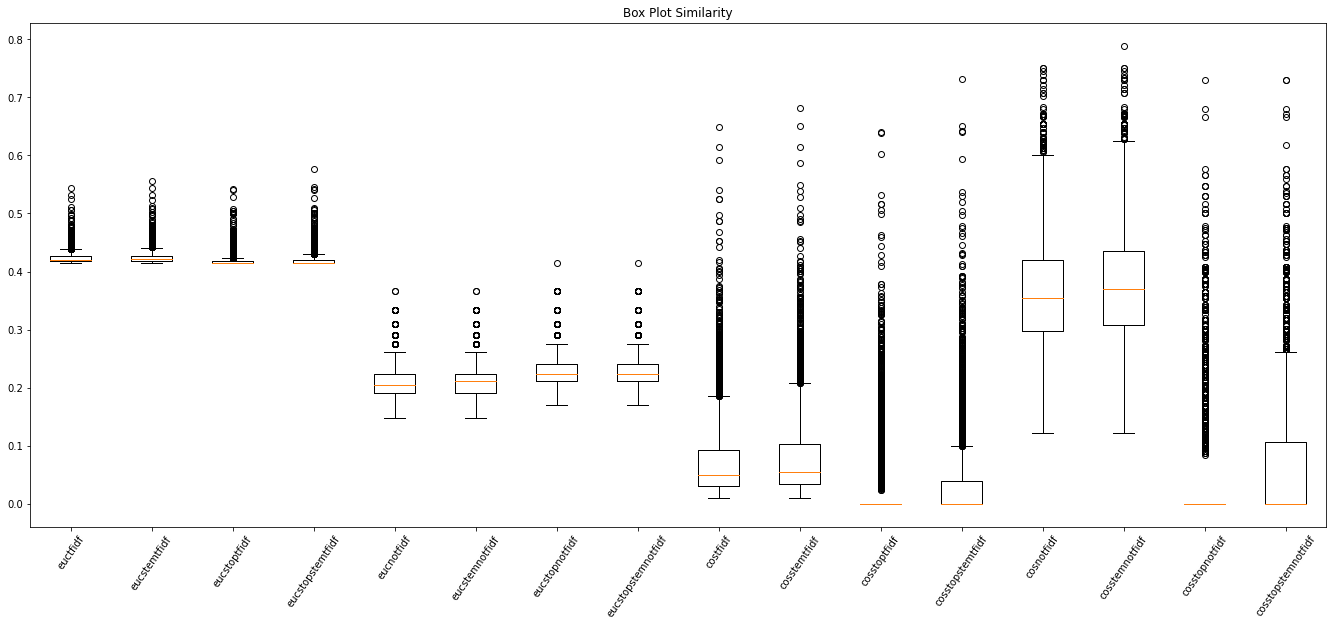

In [46]:
# boxplot all sim

fig = plt.figure(figsize =(18, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(sims,showfliers=True)
 
ax.set_xticklabels(allscen,rotation=55)
plt.title("Box Plot Similarity")
# show plot
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


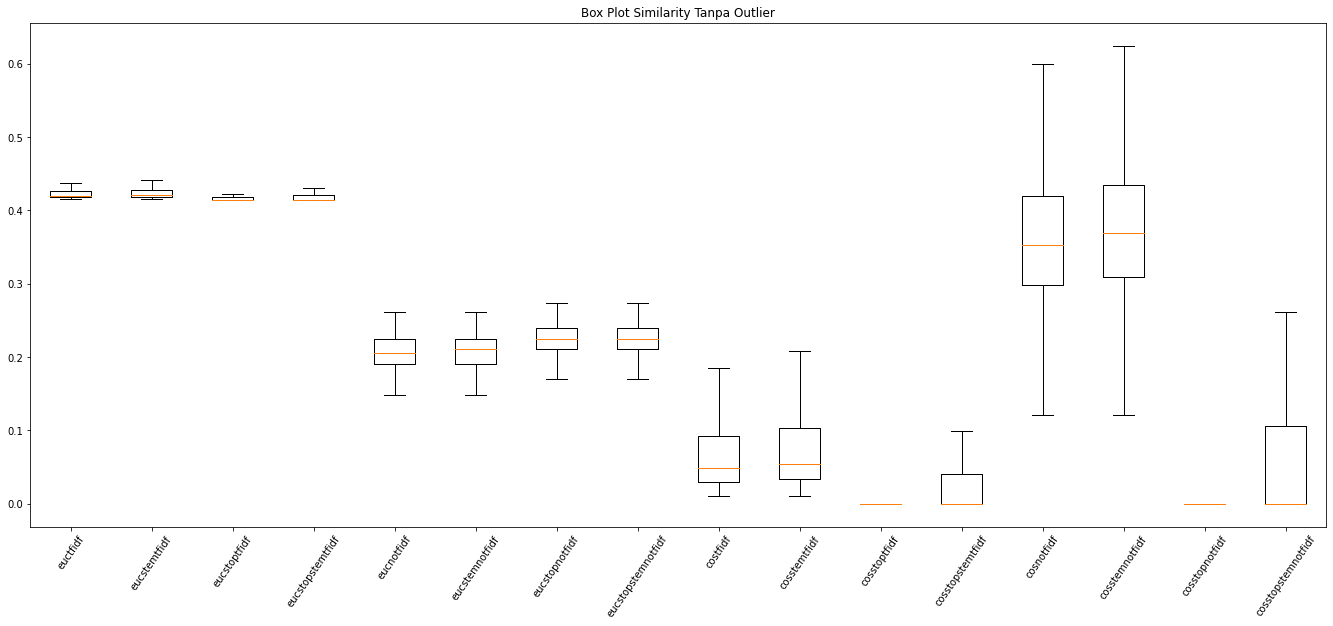

In [47]:
fig = plt.figure(figsize =(18, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(sims,showfliers=False)
 
ax.set_xticklabels(allscen,rotation=55)
plt.title("Box Plot Similarity Tanpa Outlier")
# show plot
plt.show()

### Above Similarity 0.5

In [48]:
statsfifty = [euctfidf['dfgenap'][(euctfidf['dfgenap']['euc']<0.999999999999)&(euctfidf['dfgenap']['euc']>0.5)]['euc'].describe(),
eucstemtfidf['dfgenap'][(eucstemtfidf['dfgenap']['euc']<0.999999999999)&(eucstemtfidf['dfgenap']['euc']>0.5)]['euc'].describe(),
eucstoptfidf['dfgenap'][(eucstoptfidf['dfgenap']['euc']<0.999999999999)&(eucstoptfidf['dfgenap']['euc']>0.5)]['euc'].describe(),
eucstopstemtfidf['dfgenap'][(eucstopstemtfidf['dfgenap']['euc']<0.999999999999)&(eucstopstemtfidf['dfgenap']['euc']>0.5)]['euc'].describe(),
eucnotfidf['dfgenap'][(eucnotfidf['dfgenap']['euc']<0.999999999999)&(eucnotfidf['dfgenap']['euc']>0.5)]['euc'].describe(),
eucstemnotfidf['dfgenap'][(eucstemnotfidf['dfgenap']['euc']<0.999999999999)&(eucstemnotfidf['dfgenap']['euc']>0.5)]['euc'].describe(),
eucstopnotfidf['dfgenap'][(eucstopnotfidf['dfgenap']['euc']<0.999999999999)&(eucstopnotfidf['dfgenap']['euc']>0.5)]['euc'].describe(),
eucstopstemnotfidf['dfgenap'][(eucstopstemnotfidf['dfgenap']['euc']<0.999999999999)&(eucstopstemnotfidf['dfgenap']['euc']>0.5)]['euc'].describe(),
costfidf['dfgenap'][(costfidf['dfgenap']['cos']<0.999999999999)&(costfidf['dfgenap']['cos']>0.5)]['cos'].describe(),
cosstemtfidf['dfgenap'][(cosstemtfidf['dfgenap']['cos']<0.999999999999)&(cosstemtfidf['dfgenap']['cos']>0.5)]['cos'].describe(),
cosstoptfidf['dfgenap'][(cosstoptfidf['dfgenap']['cos']<0.999999999999)&(cosstoptfidf['dfgenap']['cos']>0.5)]['cos'].describe(),
cosstopstemtfidf['dfgenap'][(cosstopstemtfidf['dfgenap']['cos']<0.999999999999)&(cosstopstemtfidf['dfgenap']['cos']>0.5)]['cos'].describe(),
cosnotfidf['dfgenap'][(cosnotfidf['dfgenap']['cos']<0.999999999999)&(cosnotfidf['dfgenap']['cos']>0.5)]['cos'].describe(),
cosstemnotfidf['dfgenap'][(cosstemnotfidf['dfgenap']['cos']<0.999999999999)&(cosstemnotfidf['dfgenap']['cos']>0.5)]['cos'].describe(),
cosstopnotfidf['dfgenap'][(cosstopnotfidf['dfgenap']['cos']<0.999999999999)&(cosstopnotfidf['dfgenap']['cos']>0.5)]['cos'].describe(),
cosstopstemnotfidf['dfgenap'][(cosstopstemnotfidf['dfgenap']['cos']<0.999999999999)&(cosstopstemnotfidf['dfgenap']['cos']>0.5)]['cos'].describe()]

In [49]:
pd.DataFrame(statsfifty).set_index(indekkall)

,count,mean,std,min,25%,50%,75%,max
euctfidf,6.0,0.521001,0.015613,0.506468,0.507543,0.518146,0.530915,0.544067
eucstemtfidf,8.0,0.523745,0.019213,0.502224,0.509533,0.518399,0.535612,0.556065
eucstoptfidf,8.0,0.516026,0.017753,0.500000,0.503392,0.506209,0.531398,0.541376
eucstopstemtfidf,10.0,0.525439,0.025412,0.500000,0.505809,0.517833,0.541359,0.577475
eucnotfidf,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eucstemnotfidf,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eucstopnotfidf,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eucstopstemnotfidf,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
costfidf,6.0,0.574707,0.051966,0.525214,0.529236,0.566814,0.609567,0.648871
cosstemtfidf,8.0,0.582474,0.061757,0.508818,0.536699,0.568064,0.623826,0.681319


In [50]:
#Boxplot
upfifty = [euctfidf['dfgenap'][(euctfidf['dfgenap']['euc']<0.999999999999)&(euctfidf['dfgenap']['euc']>0.5)]['euc'],
eucstemtfidf['dfgenap'][(eucstemtfidf['dfgenap']['euc']<0.999999999999)&(eucstemtfidf['dfgenap']['euc']>0.5)]['euc'],
eucstoptfidf['dfgenap'][(eucstoptfidf['dfgenap']['euc']<0.999999999999)&(eucstoptfidf['dfgenap']['euc']>0.5)]['euc'],
eucstopstemtfidf['dfgenap'][(eucstopstemtfidf['dfgenap']['euc']<0.999999999999)&(eucstopstemtfidf['dfgenap']['euc']>0.5)]['euc'],
costfidf['dfgenap'][(costfidf['dfgenap']['cos']<0.999999999999)&(costfidf['dfgenap']['cos']>0.5)]['cos'],
cosstemtfidf['dfgenap'][(cosstemtfidf['dfgenap']['cos']<0.999999999999)&(cosstemtfidf['dfgenap']['cos']>0.5)]['cos'],
cosstoptfidf['dfgenap'][(cosstoptfidf['dfgenap']['cos']<0.999999999999)&(cosstoptfidf['dfgenap']['cos']>0.5)]['cos'],
cosstopstemtfidf['dfgenap'][(cosstopstemtfidf['dfgenap']['cos']<0.999999999999)&(cosstopstemtfidf['dfgenap']['cos']>0.5)]['cos'],
cosnotfidf['dfgenap'][(cosnotfidf['dfgenap']['cos']<0.999999999999)&(cosnotfidf['dfgenap']['cos']>0.5)]['cos'],
cosstemnotfidf['dfgenap'][(cosstemnotfidf['dfgenap']['cos']<0.999999999999)&(cosstemnotfidf['dfgenap']['cos']>0.5)]['cos'],
cosstopnotfidf['dfgenap'][(cosstopnotfidf['dfgenap']['cos']<0.999999999999)&(cosstopnotfidf['dfgenap']['cos']>0.5)]['cos'],
cosstopstemnotfidf['dfgenap'][(cosstopstemnotfidf['dfgenap']['cos']<0.999999999999)&(cosstopstemnotfidf['dfgenap']['cos']>0.5)]['cos']]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


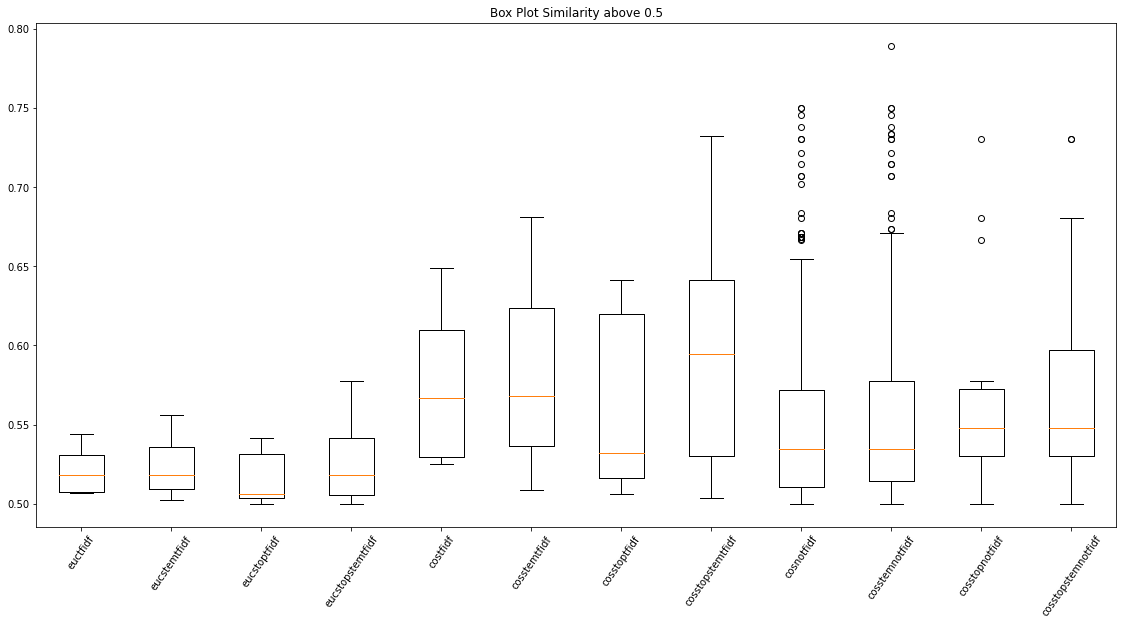

In [51]:
figure = plt.figure(figsize =(15, 7))
 
# Creating axes instance
ax = figure.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(upfifty,showfliers=True)
 
ax.set_xticklabels(['euctfidf','eucstemtfidf','eucstoptfidf','eucstopstemtfidf',
          'costfidf','cosstemtfidf','cosstoptfidf','cosstopstemtfidf',
          'cosnotfidf','cosstemnotfidf','cosstopnotfidf','cosstopstemnotfidf'],rotation=55)
plt.title("Box Plot Similarity above 0.5")
# show plot
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


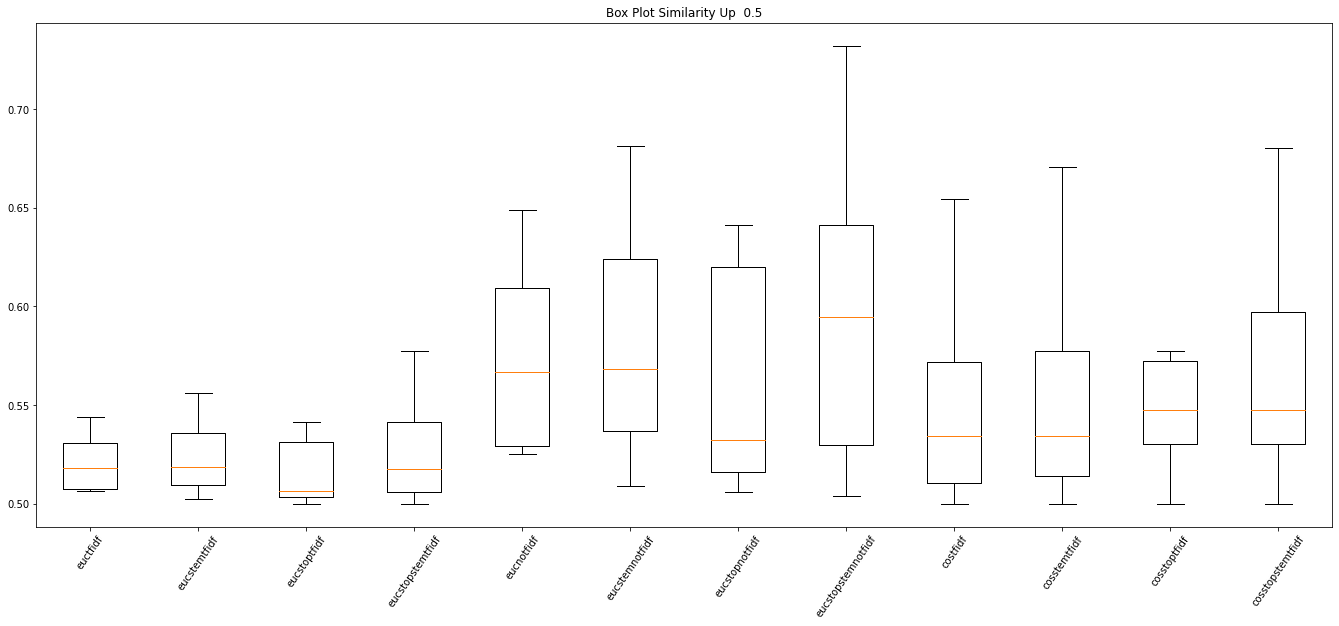

In [52]:
fig = plt.figure(figsize =(18, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(upfifty,showfliers=False)
 
ax.set_xticklabels(allscen,rotation=55)
plt.title("Box Plot Similarity Up  0.5")
# show plot
plt.show()

### Percentage Above 0.5

In [53]:
fifties = [euctfidf['percentage'],
eucstemtfidf['percentage'],
eucstoptfidf['percentage'],
eucstopstemtfidf['percentage'],
eucnotfidf['percentage'],
eucstemnotfidf['percentage'],
eucstopnotfidf['percentage'],
eucstopstemnotfidf['percentage'],
costfidf['percentage'],
cosstemtfidf['percentage'],
cosstoptfidf['percentage'],
cosstopstemtfidf['percentage'],
cosnotfidf['percentage'],
cosstemnotfidf['percentage'],
cosstopnotfidf['percentage'],
cosstopstemnotfidf['percentage']]

In [54]:
pd.DataFrame(fifties,columns=['percentages']).set_index(indekkall)

,percentages
euctfidf,0.109910
eucstemtfidf,0.146547
eucstoptfidf,0.146547
eucstopstemtfidf,0.183184
eucnotfidf,0.000000
eucstemnotfidf,0.000000
eucstopnotfidf,0.000000
eucstopstemnotfidf,0.000000
costfidf,0.109910
cosstemtfidf,0.146547


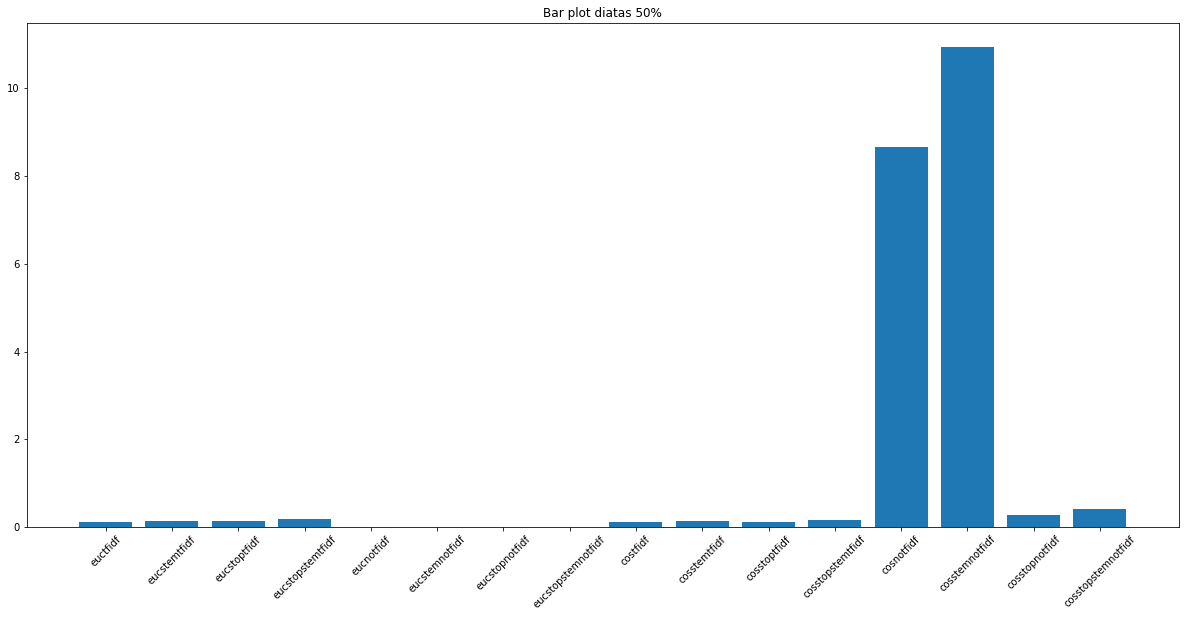

In [55]:
fig = plt.figure(figsize =(16, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.bar(allscen,fifties)
 
ax.set_xticklabels(allscen,rotation=45)
plt.title("Bar plot diatas 50%")
# show plot
plt.show()

## Analysis Title 93 - 91

In [59]:
euctfidf['dfgenap'][(euctfidf['dfgenap']['a']==91)&(euctfidf['dfgenap']['b']==93)]

,a,b,euc,titlea,titleb
9648,91,93,0.506524,application of improved convolutional neural network in medical image segmentation,review on the application of deep convolution neural network in medical image segmentation


In [60]:
eucstemtfidf['dfgenap'][(eucstemtfidf['dfgenap']['a']==93)&(eucstemtfidf['dfgenap']['b']==91)]

,a,b,euc,titlea,titleb,stopa,stopb
9856,93,91,0.556065,review on the application of deep convolution neural network in medical image segmentation,application of improved convolutional neural network in medical image segmentation,review on the applic of deep convolut neural network in medic imag segment,applic of improv convolut neural network in medic imag segment


In [61]:
eucstoptfidf['dfgenap'][(eucstoptfidf['dfgenap']['a']==93)&(eucstoptfidf['dfgenap']['b']==91)]

,a,b,euc,titlea,titleb,stopa,stopb
9856,93,91,0.499871,review on the application of deep convolution neural network in medical image segmentation,application of improved convolutional neural network in medical image segmentation,review application deep convolution neural network,application improved convolutional neural network


In [62]:
eucstopstemtfidf['dfgenap'][(eucstopstemtfidf['dfgenap']['a']==91)&(eucstopstemtfidf['dfgenap']['b']==93)]

,a,b,euc,titlea,titleb,stopa,stopb
9648,91,93,0.577475,application of improved convolutional neural network in medical image segmentation,review on the application of deep convolution neural network in medical image segmentation,applic improv convolut neural network,review applic deep convolut neural network


In [63]:
eucnotfidf['dfgenap'][(eucnotfidf['dfgenap']['a']==93)&(eucnotfidf['dfgenap']['b']==91)]

,a,b,euc,titlea,titleb
9856,93,91,0.274292,review on the application of deep convolution neural network in medical image segmentation,application of improved convolutional neural network in medical image segmentation


In [64]:
eucstemnotfidf['dfgenap'][(eucstemnotfidf['dfgenap']['a']==91)&(eucstemnotfidf['dfgenap']['b']==93)]

,a,b,euc,titlea,titleb,stopa,stopb
9648,91,93,0.309017,application of improved convolutional neural network in medical image segmentation,review on the application of deep convolution neural network in medical image segmentation,applic of improv convolut neural network in medic imag segment,review on the applic of deep convolut neural network in medic imag segment


In [65]:
eucstopnotfidf['dfgenap'][(eucstopnotfidf['dfgenap']['a']==91)&(eucstopnotfidf['dfgenap']['b']==93)]

,a,b,euc,titlea,titleb,stopa,stopb
9648,91,93,0.309017,application of improved convolutional neural network in medical image segmentation,review on the application of deep convolution neural network in medical image segmentation,application improved convolutional neural network,review application deep convolution neural network


In [66]:
eucstopstemnotfidf['dfgenap'][(eucstopstemnotfidf['dfgenap']['a']==91)&(eucstopstemnotfidf['dfgenap']['b']==93)]

,a,b,euc,titlea,titleb,stopa,stopb


In [67]:
costfidf['dfgenap'][(costfidf['dfgenap']['a']==93)&(costfidf['dfgenap']['b']==91)]

,a,b,cos,titlea,titleb
9856,93,91,0.525427,review on the application of deep convolution neural network in medical image segmentation,application of improved convolutional neural network in medical image segmentation


In [68]:
cosstemtfidf['dfgenap'][(cosstemtfidf['dfgenap']['a']==91)&(cosstemtfidf['dfgenap']['b']==93)]

,a,b,cos,titlea,titleb,stopa,stopb
9648,91,93,0.681319,application of improved convolutional neural network in medical image segmentation,review on the application of deep convolution neural network in medical image segmentation,applic of improv convolut neural network in medic imag segment,review on the applic of deep convolut neural network in medic imag segment


In [69]:
cosstoptfidf['dfgenap'][(cosstoptfidf['dfgenap']['a']==91)&(cosstoptfidf['dfgenap']['b']==93)]

,a,b,cos,titlea,titleb,stopa,stopb
9648,91,93,0.499484,application of improved convolutional neural network in medical image segmentation,review on the application of deep convolution neural network in medical image segmentation,application improved convolutional neural network,review application deep convolution neural network


In [70]:
cosstopstemtfidf['dfgenap'][(cosstopstemtfidf['dfgenap']['a']==93)&(cosstopstemtfidf['dfgenap']['b']==91)]

,a,b,cos,titlea,titleb,stopa,stopb
9856,93,91,0.732324,review on the application of deep convolution neural network in medical image segmentation,application of improved convolutional neural network in medical image segmentation,review applic deep convolut neural network,applic improv convolut neural network


In [71]:
cosnotfidf['dfgenap'][(cosnotfidf['dfgenap']['a']==91)&(cosnotfidf['dfgenap']['b']==93)]

,a,b,cos,titlea,titleb
9648,91,93,0.701646,application of improved convolutional neural network in medical image segmentation,review on the application of deep convolution neural network in medical image segmentation


In [72]:
cosstemnotfidf['dfgenap'][(cosstemnotfidf['dfgenap']['a']==93)&(cosstemnotfidf['dfgenap']['b']==91)]

,a,b,cos,titlea,titleb,stopa,stopb
9856,93,91,0.789352,review on the application of deep convolution neural network in medical image segmentation,application of improved convolutional neural network in medical image segmentation,review on the applic of deep convolut neural network in medic imag segment,applic of improv convolut neural network in medic imag segment


In [73]:
cosstopnotfidf['dfgenap'][(cosstopnotfidf['dfgenap']['a']==91)&(cosstopnotfidf['dfgenap']['b']==93)]

,a,b,cos,titlea,titleb,stopa,stopb
9648,91,93,0.547723,application of improved convolutional neural network in medical image segmentation,review on the application of deep convolution neural network in medical image segmentation,application improved convolutional neural network,review application deep convolution neural network


In [74]:
cosstopstemnotfidf['dfgenap'][(cosstopstemnotfidf['dfgenap']['a']==93)&(cosstopstemnotfidf['dfgenap']['b']==91)]

,a,b,cos,titlea,titleb,stopa,stopb
9856,93,91,0.730297,review on the application of deep convolution neural network in medical image segmentation,application of improved convolutional neural network in medical image segmentation,review applic deep convolut neural network,applic improv convolut neural network


## Execution Time

In [38]:
avgtimeses = [np.mean(euctfidf['times'])*1000,
np.mean(eucstemtfidf['times'])*1000,
np.mean(eucstoptfidf['times'])*1000,
np.mean(eucstopstemtfidf['times'])*1000,
np.mean(eucnotfidf['times'])*1000,
np.mean(eucstemnotfidf['times'])*1000,
np.mean(eucstopnotfidf['times'])*1000,
np.mean(eucstopstemnotfidf['times'])*1000,
np.mean(costfidf['times'])*1000,
np.mean(cosstemtfidf['times'])*1000,
np.mean(cosstoptfidf['times'])*1000,
np.mean(cosstopstemtfidf['times'])*1000,
np.mean(cosnotfidf['times'])*1000,
np.mean(cosstemnotfidf['times'])*1000,
np.mean(cosstopnotfidf['times'])*1000,
np.mean(cosstopstemnotfidf['times'])*1000]
pd.DataFrame(avgtimeses,columns=['mean(ms)']).set_index(indekkall)

,mean(ms)
euctfidf,1.211476
eucstemtfidf,0.993729
eucstoptfidf,0.708961
eucstopstemtfidf,0.742531
eucnotfidf,1.879787
eucstemnotfidf,1.869369
eucstopnotfidf,1.330495
eucstopstemnotfidf,1.157951
costfidf,1.369286
cosstemtfidf,0.958896


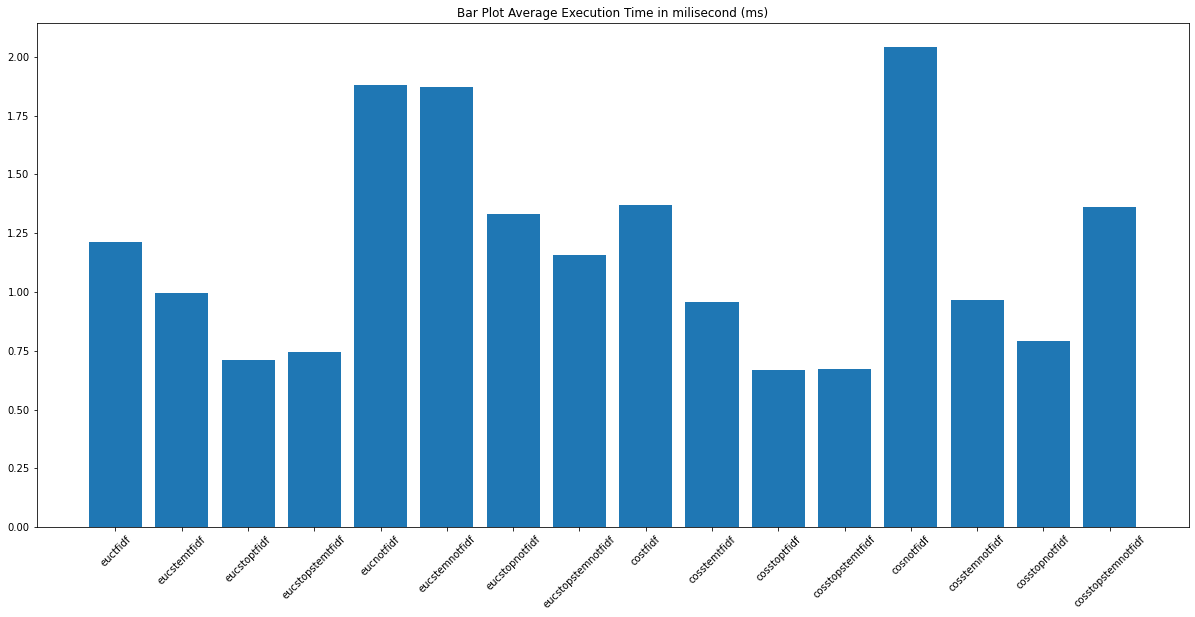

In [41]:
#Bar Plot Execution Time
fig = plt.figure(figsize =(16, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.bar(allscen,avgtimeses)
 
ax.set_xticklabels(allscen,rotation=45)
plt.title("Bar Plot Average Execution Time in milisecond (ms)")
# show plot
plt.show()

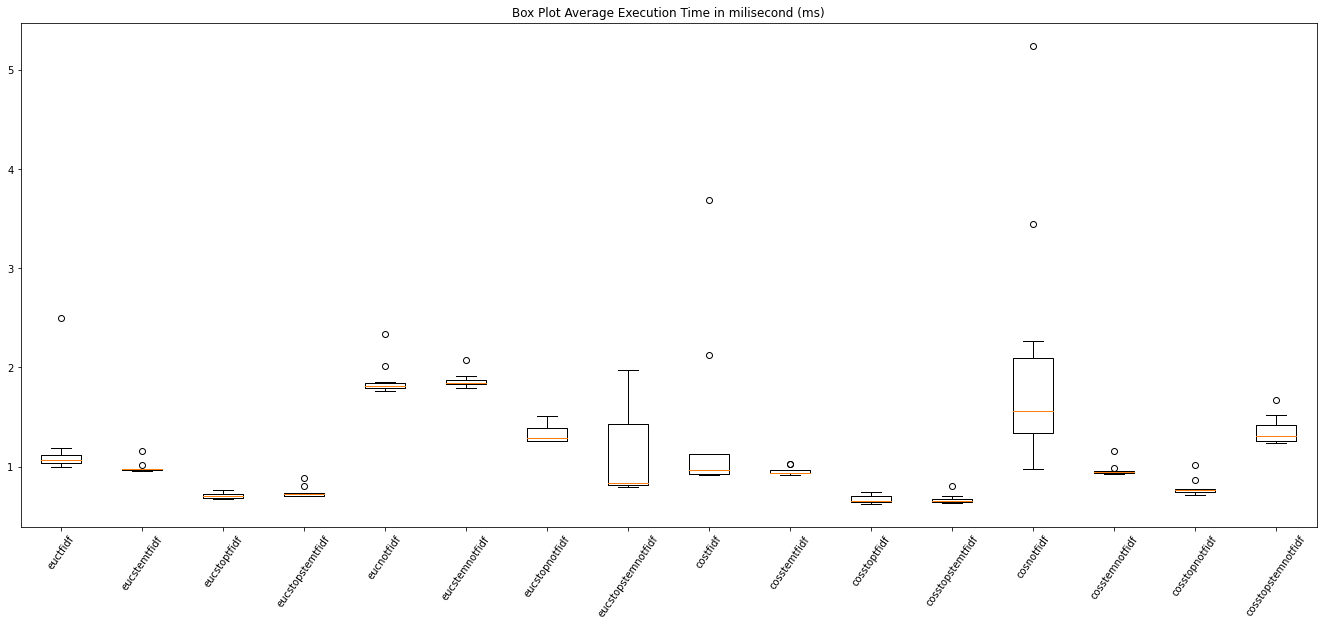

In [42]:
#Box Plot Execution Time
timeses = [np.dot(euctfidf['times'],1000),
np.dot(eucstemtfidf['times'],1000),
np.dot(eucstoptfidf['times'],1000),
np.dot(eucstopstemtfidf['times'],1000),
np.dot(eucnotfidf['times'],1000),
np.dot(eucstemnotfidf['times'],1000),
np.dot(eucstopnotfidf['times'],1000),
np.dot(eucstopstemnotfidf['times'],1000),
np.dot(costfidf['times'],1000),
np.dot(cosstemtfidf['times'],1000),
np.dot(cosstoptfidf['times'],1000),
np.dot(cosstopstemtfidf['times'],1000),
np.dot(cosnotfidf['times'],1000),
np.dot(cosstemnotfidf['times'],1000),
np.dot(cosstopnotfidf['times'],1000),
np.dot(cosstopstemnotfidf['times'],1000)]

fig = plt.figure(figsize =(18, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(timeses)
 
ax.set_xticklabels(allscen,rotation=55)
plt.title("Box Plot Average Execution Time in milisecond (ms)")
# show plot
plt.show()

## Word Cloud

In [75]:
# !pip install wordcloud


In [76]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

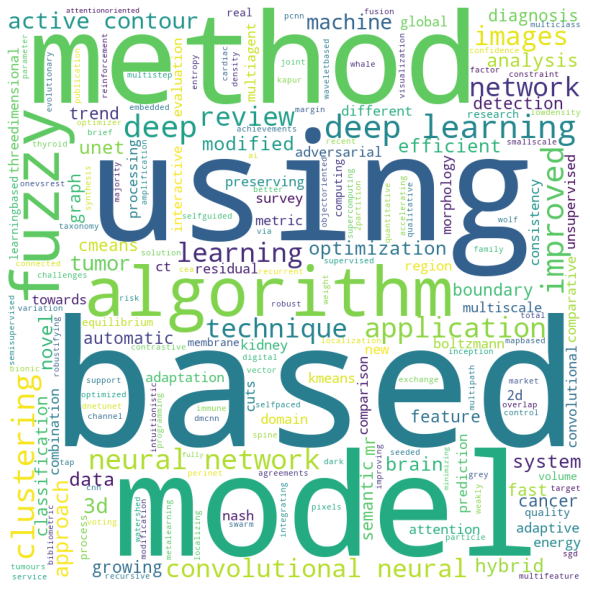

In [78]:
# Stopword Removed
comment_words = ''
for val in dfstop["title after stopwords"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()